In [17]:
import numpy as np
import plotly.express as px
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, plot_confusion_matrix
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from sklearn.datasets import (
    load_boston,
    load_diabetes,
    load_breast_cancer,
    load_iris
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# BOSTON HOUSING

In [46]:
X, y = load_boston(return_X_y=True)
standardize = StandardScaler()
X = standardize.fit_transform(X)
mlp_reg = MLPRegressor(hidden_layer_sizes = 13, activation='logistic', solver='lbfgs', max_iter=2500)
mlp_regR = MLPRegressor(hidden_layer_sizes = 13, activation='logistic', solver='lbfgs', max_iter=2500, alpha=10)
rbf = GaussianProcessRegressor(RBF())
mse_mlp, mse_mlpR, mse_RBF = [], [], []

for _ in range(50):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
    
    mlp_reg.fit(x_train, y_train)
    y_hat = mlp_reg.predict(x_test)
    mlp_regR.fit(x_train, y_train)
    y_hatR = mlp_regR.predict(x_test)
    rbf.fit(x_train, y_train)
    y_hatRBF = rbf.predict(x_test)

    mse_mlp.append(mean_squared_error(y_hat, y_test))
    mse_mlpR.append(mean_squared_error(y_hatR, y_test))
    mse_RBF.append(mean_squared_error(y_hatRBF, y_test))

/usr/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/li

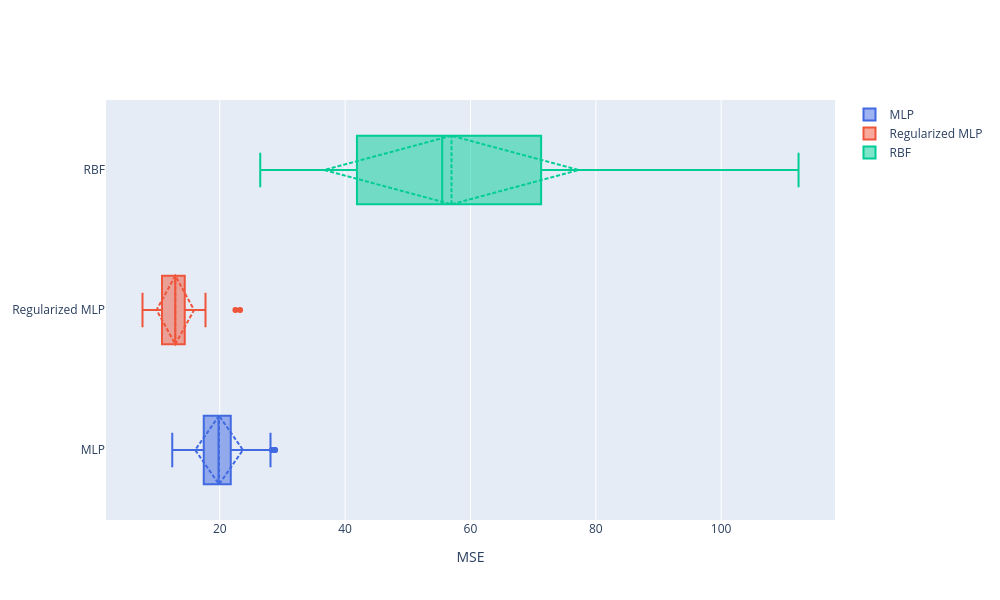

In [61]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=mse_mlp, name='MLP', marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=mse_mlpR, name='Regularized MLP', boxmean='sd'))
fig.add_trace(go.Box(x=mse_RBF, name='RBF', boxmean='sd'))
fig.update_layout(xaxis_title='MSE', width=1000, height=600)
fig.show(renderer = 'png', width=1000, height=600)

In [47]:
y_test.shape

(152,)

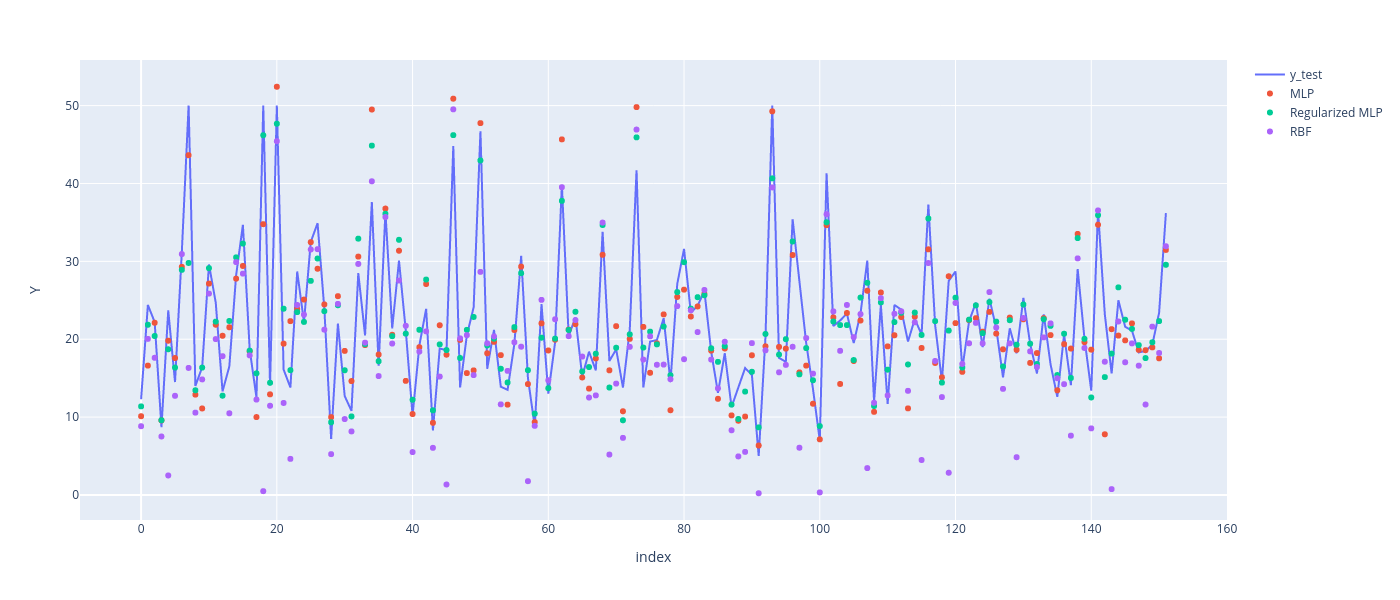

In [49]:
fig = px.line()
fig.add_scatter(x=np.arange(152), y=y_test, name='y_test')
fig.add_scatter(x=np.arange(152), y=y_hat, name='MLP', mode='markers')
fig.add_scatter(x=np.arange(152), y=y_hatR, name='Regularized MLP', mode='markers')
fig.add_scatter(x=np.arange(152), y=y_hatRBF, name='RBF', mode='markers')
fig.update_layout(xaxis_title = 'index', yaxis_title = 'Y')
fig.show(renderer = 'png', width=1400, height = 600)

In [60]:
print(np.min(mse_mlp), np.mean(mse_mlp), np.std(mse_mlp))
print(np.min(mse_mlpR), np.mean(mse_mlpR), np.std(mse_mlpR))
print(np.min(mse_RBF), np.mean(mse_RBF), np.std(mse_RBF))

12.421010917588541 19.890223156453132 3.809738138100263
7.666769144504586 12.910001344801337 2.992126229952801
26.460829781416802 56.96797565556715 20.303906765514583


# DIABETES

In [14]:
X, y = load_diabetes(return_X_y=True)
#standardize = StandardScaler()
#X = standardize.fit_transform(X)
mlp_reg2 = MLPRegressor(activation='logistic', solver='lbfgs', max_iter=2500)

In [20]:
mlp_reg = MLPRegressor(hidden_layer_sizes = 9, activation='logistic', solver='lbfgs', max_iter=2500)
mlp_regR = MLPRegressor(hidden_layer_sizes = 9, activation='logistic', solver='lbfgs', max_iter=2500, alpha=10)
rbf = GaussianProcessRegressor(RBF())
mse_mlp, mse_mlpR, mse_RBF = [], [], []

for _ in range(50):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
    
    mlp_reg.fit(x_train, y_train)
    y_hat = mlp_reg.predict(x_test)
    mlp_regR.fit(x_train, y_train)
    y_hatR = mlp_regR.predict(x_test)
    rbf.fit(x_train, y_train)
    y_hatRBF = rbf.predict(x_test)

    mse_mlp.append(mean_squared_error(y_hat, y_test))
    mse_mlpR.append(mean_squared_error(y_hatR, y_test))
    mse_RBF.append(mean_squared_error(y_hatRBF, y_test))

/usr/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning:

The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.

/usr/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/lib/python3.9/site-packages/sklearn/gaussian_process/kerne

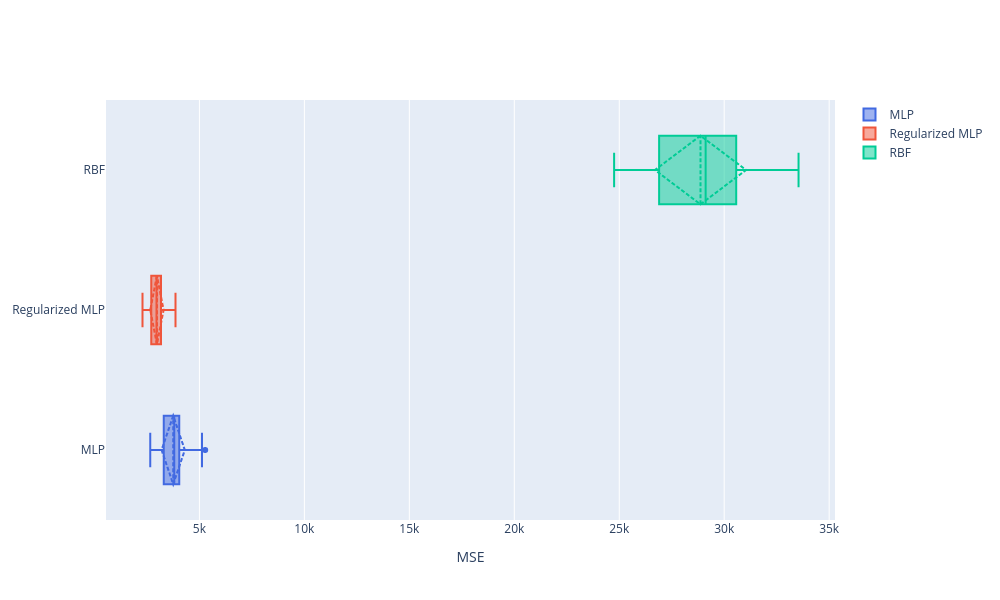

In [21]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=mse_mlp, name='MLP', marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=mse_mlpR, name='Regularized MLP', boxmean='sd'))
fig.add_trace(go.Box(x=mse_RBF, name='RBF', boxmean='sd'))
fig.update_layout(xaxis_title='MSE', width=1000, height=600)
fig.show(renderer = 'png', width=1000, height=600)

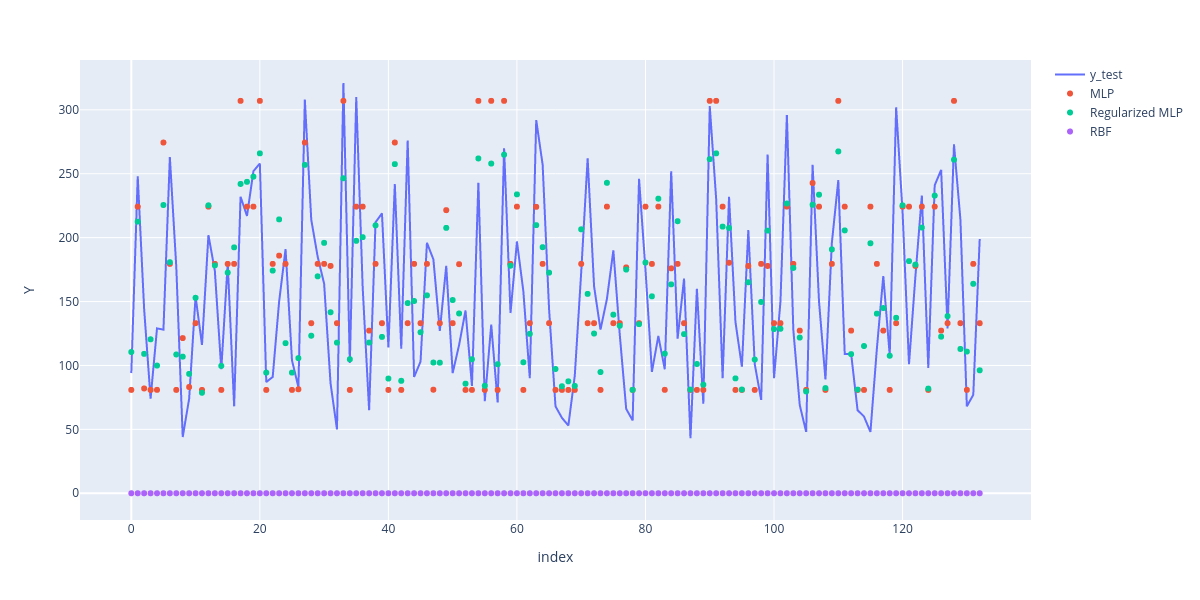

In [43]:
import pandas as pd
df = pd.DataFrame()
df['x'] = np.arange(133)
df['y_test'] = y_test
fig = px.line()
fig.add_scatter(x=np.arange(133), y=y_test, name='y_test')
fig.add_scatter(x=np.arange(133), y=y_hat, name='MLP', mode='markers')
fig.add_scatter(x=np.arange(133), y=y_hatR, name='Regularized MLP', mode='markers')
fig.add_scatter(x=np.arange(133), y=y_hatRBF, name='RBF', mode='markers')
fig.update_layout(xaxis_title = 'index', yaxis_title = 'Y')
fig.show(renderer = 'png', width=1200, height = 600)

In [45]:
print(np.mean(mse_mlp), np.std(mse_mlp), np.min(mse_mlp))
print(np.mean(mse_mlpR), np.std(mse_mlpR), np.min(mse_mlpR))
print(np.mean(mse_RBF), np.std(mse_RBF), np.min(mse_RBF))

3751.9979002092186 552.1983832531289 2655.670007340472
2975.9523164061156 317.2611613971588 2286.3830032502574
28869.926616541354 2170.5849227531985 24755.676691729324


# BREAST CANCER

In [87]:
X, y = load_breast_cancer(return_X_y=True)
standardize = StandardScaler()
X = standardize.fit_transform(X)

#mlp_reg = MLPRegressor(hidden_layer_sizes = 13, activation='logistic', solver='lbfgs', max_iter=2500)
#mlp_regR = MLPRegressor(hidden_layer_sizes = 13, activation='logistic', solver='lbfgs', max_iter=2500, alpha=10)
#mlp_clf = MLPClassifier()

In [88]:
mlp_clf = MLPClassifier(hidden_layer_sizes = 20, activation='logistic', solver='lbfgs', max_iter=2500)
mlp_clfR = MLPClassifier(hidden_layer_sizes = 20, activation='logistic', solver='lbfgs', max_iter=2500, alpha=0.1)
rbf = GaussianProcessClassifier(RBF())
mse_mlp, mse_mlpR, mse_RBF = [], [], []

for _ in range(50):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
    
    mlp_clf.fit(x_train, y_train)
    y_hat = mlp_clf.predict(x_test)
    mlp_clfR.fit(x_train, y_train)
    y_hatR = mlp_clfR.predict(x_test)
    rbf.fit(x_train, y_train)
    y_hatRBF = rbf.predict(x_test)

    mse_mlp.append(mlp_clf.score(x_test, y_test))
    mse_mlpR.append(mlp_clfR.score(x_test, y_test))
    mse_RBF.append(rbf.score(x_test, y_test))

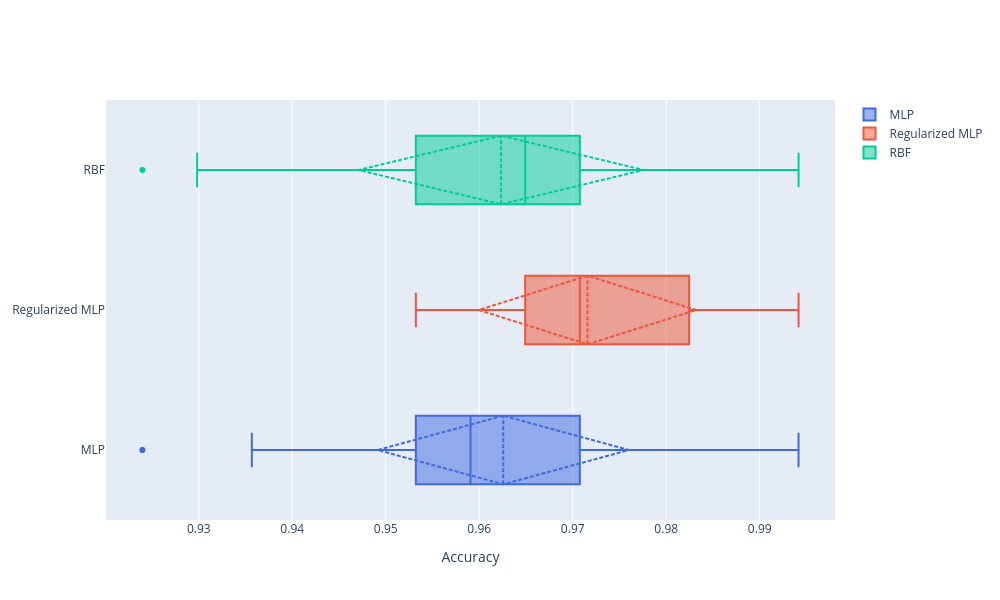

In [10]:
fig = go.Figure()
fig.add_trace(go.Box(x=mse_mlp, name='MLP', marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=mse_mlpR, name='Regularized MLP', boxmean='sd'))
fig.add_trace(go.Box(x=mse_RBF, name='RBF', boxmean='sd'))
fig.update_layout(xaxis_title='Accuracy', width=1000, height=600)
fig.show(renderer = 'png', width=1000, height=600)

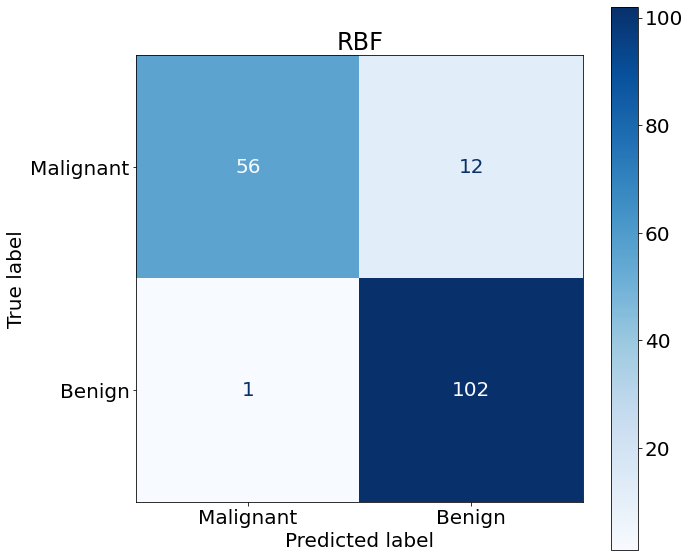

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plot_confusion_matrix(rbf, x_test, y_test, cmap='Blues', display_labels = ['Malignant', 'Benign'], ax=axes)
plt.rcParams.update({'font.size': 20})
axes.title.set_text('RBF')
plt.show()

In [89]:
print(np.mean(mse_mlp), np.std(mse_mlp), np.max(mse_mlp))
print(np.mean(mse_mlpR), np.std(mse_mlpR), np.max(mse_mlpR))
print(np.mean(mse_RBF), np.std(mse_RBF), np.max(mse_RBF))

0.9635087719298245 0.013767428275613714 0.9941520467836257
0.9711111111111111 0.012780688040921624 0.9941520467836257
0.9612865497076024 0.01641140317275452 0.9941520467836257


# Iris

In [65]:
X, y = load_iris(return_X_y=True)
#standardize = StandardScaler()
#X = standardize.fit_transform(X)

In [78]:
mlp_clf = MLPClassifier(hidden_layer_sizes = 6, activation='logistic', solver='lbfgs', max_iter=2500)
mlp_clfR = MLPClassifier(hidden_layer_sizes = 6, activation='logistic', solver='lbfgs', max_iter=2500, alpha=1e-06)
rbf = GaussianProcessClassifier(RBF())
mse_mlp, mse_mlpR, mse_RBF = [], [], []

for _ in range(50):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
    
    mlp_clf.fit(x_train, y_train)
    y_hat = mlp_clf.predict(x_test)
    mlp_clfR.fit(x_train, y_train)
    y_hatR = mlp_clfR.predict(x_test)
    rbf.fit(x_train, y_train)
    y_hatRBF = rbf.predict(x_test)

    mse_mlp.append(mlp_clf.score(x_test, y_test))
    mse_mlpR.append(mlp_clfR.score(x_test, y_test))
    mse_RBF.append(rbf.score(x_test, y_test))

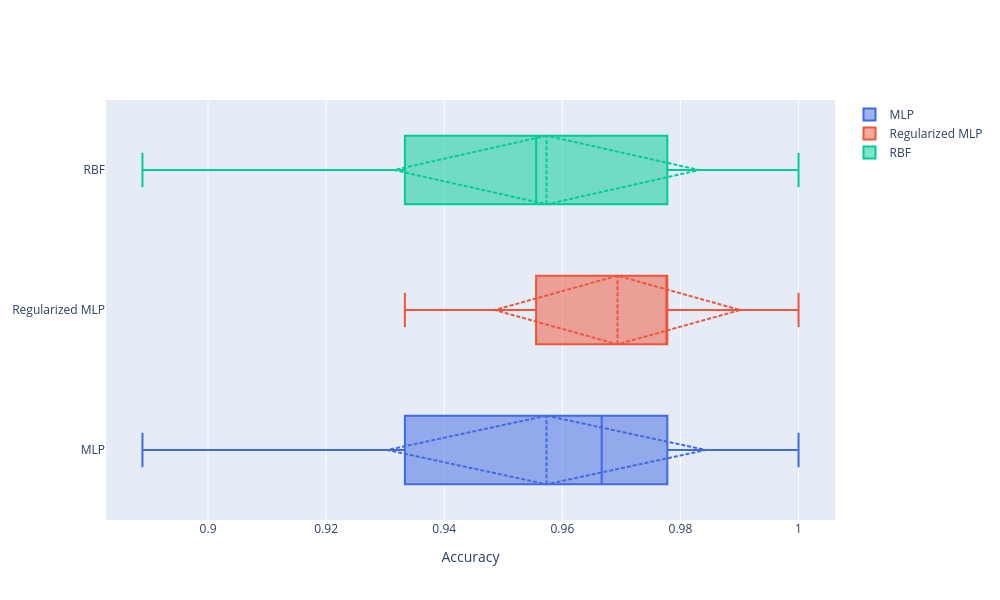

In [79]:
fig = go.Figure()
fig.add_trace(go.Box(x=mse_mlp, name='MLP', marker_color='royalblue', boxmean='sd'))
fig.add_trace(go.Box(x=mse_mlpR, name='Regularized MLP', boxmean='sd'))
fig.add_trace(go.Box(x=mse_RBF, name='RBF', boxmean='sd'))
fig.update_layout(xaxis_title='Accuracy', width=1000, height=600)
fig.show(renderer = 'png', width=1000, height=600)

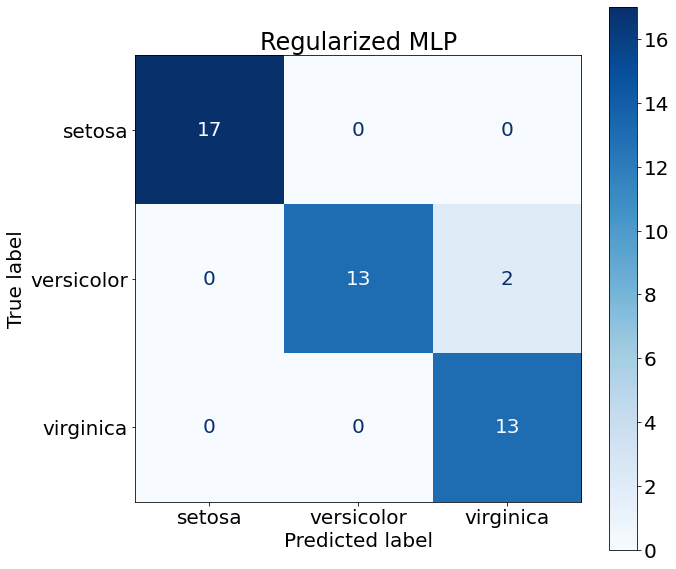

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plot_confusion_matrix(rbf, x_test, y_test, cmap='Blues', display_labels = data.target_names, ax=axes)
plt.rcParams.update({'font.size': 20})
axes.title.set_text('Regularized MLP')
plt.show()

In [86]:
print(np.mean(mse_mlp), np.std(mse_mlp), np.max(mse_mlp))
print(np.mean(mse_mlpR), np.std(mse_mlpR), np.max(mse_mlpR))
print(np.mean(mse_RBF), np.std(mse_RBF), np.max(mse_RBF))

0.9573333333333331 0.02697598383198847 1.0
0.9693333333333333 0.020794111227181465 1.0
0.9573333333333334 0.02585429257288708 1.0


## Cross-Validation

In [72]:
data = load_iris()

In [50]:
y_test

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [75]:
mlp_clf2 = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=2500)
param_grid = [
  {'hidden_layer_sizes':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], 'activation': ['logistic'], 'solver': ['lbfgs'], 'alpha':[0.000001, 0.000003, 0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3], 'max_iter':[2500]},]
search = GridSearchCV(mlp_clf2, param_grid=param_grid, cv=10)
search.fit(X, y)

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic', max_iter=2500,
                                     solver='lbfgs'),
             param_grid=[{'activation': ['logistic'],
                          'alpha': [1e-06, 3e-06, 1e-05, 3e-05, 0.0001, 0.0003,
                                    0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
                          'hidden_layer_sizes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 15, 20],
                          'max_iter': [2500], 'solver': ['lbfgs']}])

In [76]:
search.best_score_

0.9800000000000001

In [77]:
search.best_params_

{'activation': 'logistic',
 'alpha': 1e-06,
 'hidden_layer_sizes': 6,
 'max_iter': 2500,
 'solver': 'lbfgs'}

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
print(mean_squared_error(y_hat, y_test))
print(mean_squared_error(y_hatR, y_test))
print(mean_squared_error(y_hatRBF, y_test))

18.615474947891947
13.237848398520926
85.25601586552607


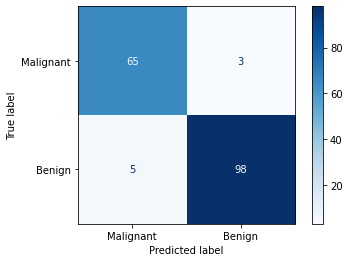

In [22]:
rbf = GaussianProcessRegressor(RBF()).fit(x_train, y_train)
#rbf
rbf.score(x_test,y_test)

0.2752394516916403

In [ ]:
alpha = 10
hidden_layer_sizes = 13

alpha = 10
hidden_layer_sizes = 15

alpha = 0.1
hidden_layer_sizes = 20

In [47]:
rng = np.random.default_rng()
rng.integers(5,154)

105